In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind
import matplotlib.patches as mpatches
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler

# DATA PREPROCESSING

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### Meta Data Dataset

#### Invoice ID : Nomor identifikasi faktur slip penjualan yang dihasilkan komputer
#### Branch : Cabang dari supercenter (tersedia 3 cabang yang diidentifikasi dengan A, B, dan C).
#### City: Lokasi supercenter
#### Costumer Type : Jenis pelanggan, dicatat oleh Anggota untuk pelanggan yang menggunakan kartu anggota dan Normal untuk pelanggan yang tidak memiliki kartu anggota.
#### Gender : Jenis kelamin pelanggan
#### Produk line : Kelompok kategorisasi barang umum - Aksesori elektronik, Aksesori fashion, Makanan dan minuman, Kesehatan dan kecantikan, Rumah dan gaya hidup, Olahraga dan perjalanan
#### Unit price : Harga setiap produk dalam $.
#### Quantity: Jumlah produk yang dibeli oleh pelanggan
#### Tax 5 %(pajak) : Biaya pajak 5% untuk pembelian pelanggan
#### Total: Total harga termasuk pajak
#### Date : Tanggal pembelian (Catatan tersedia dari Januari 2019 hingga Maret 2019)
#### Time : Waktu pembelian (10:00 hingga 21:00)
#### Payment : Pembayaran yang digunakan oleh pelanggan untuk pembelian (tersedia 3 metode - Tunai, kartu kredit dan Ewallet)
#### Cogs : Harga pokok penjualan
#### gross margin percentage : Persentase margin kotor
#### Gross Income: Pendapatan kotor
#### Rating: Peringkat stratifikasi pelanggan atas pengalaman berbelanja mereka secara keseluruhan (Dalam skala 1 sampai 10)


In [3]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### CEK KENORMALAN DATA

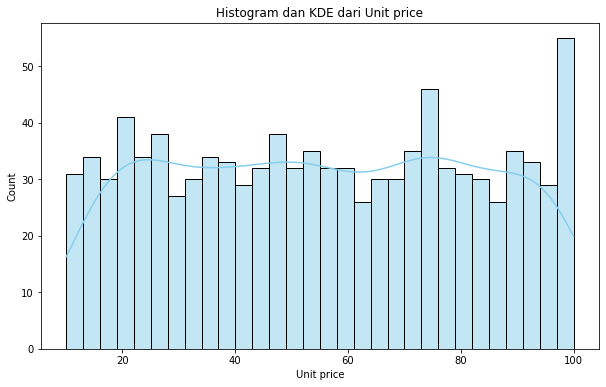

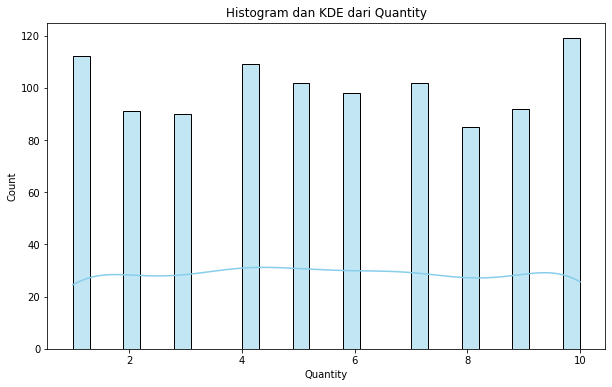

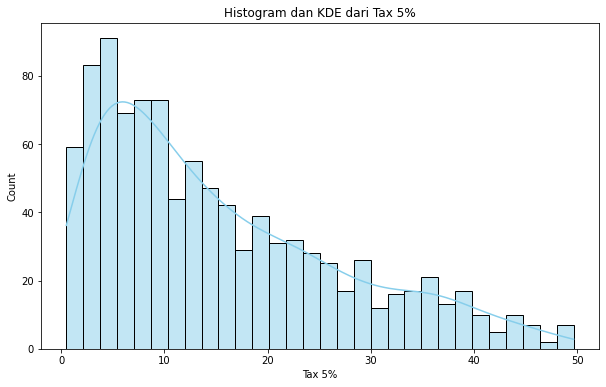

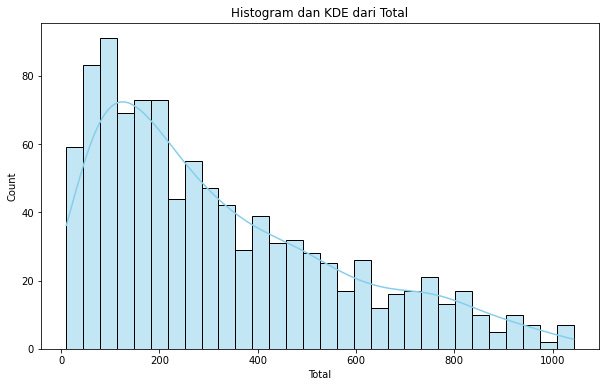

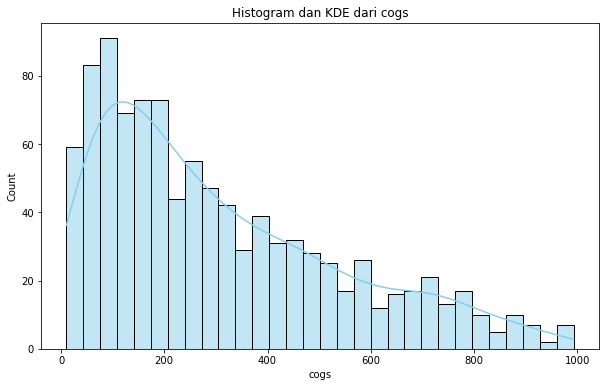

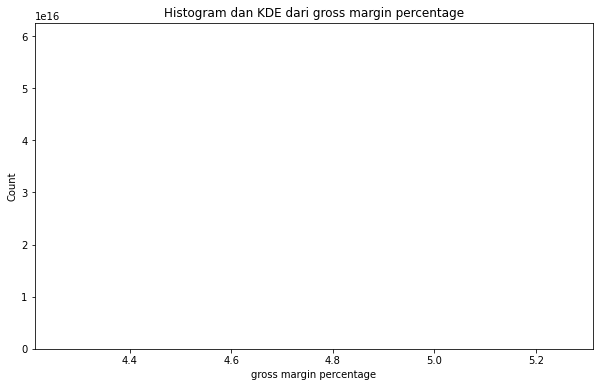

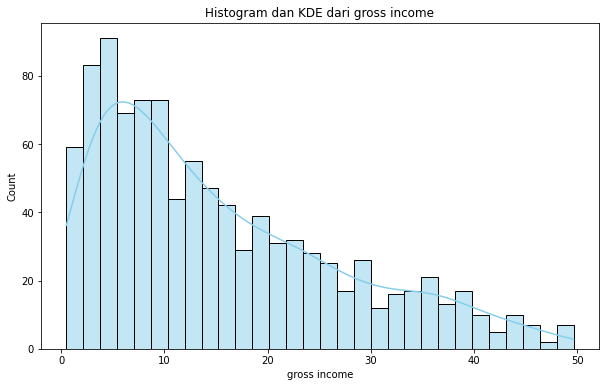

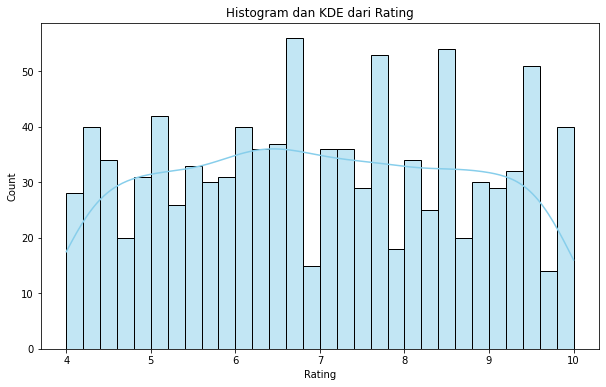

In [6]:
kolom_yang_diperiksa = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

for kolom in kolom_yang_diperiksa:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[kolom], kde=True, color='skyblue', bins=30)
    plt.title('Histogram dan KDE dari ' + kolom)
    plt.show()

## Future Enginering

In [7]:
df['Total Quantity'] = df['Unit price'] * df['Quantity']
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total Quantity
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,40.35
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,31.84
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,65.82


In [8]:
total_per_product_line = df.groupby('Product line')['Total'].sum().reset_index()
total_per_product_line.rename(columns={'Total': 'Total Per Product Line'}, inplace=True)
df1 = df.merge(total_per_product_line, on='Product line', how='left')
df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total Quantity,Total Per Product Line
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83,49193.7390
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40,54337.5315
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31,53861.9130
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76,49193.7390
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17,55122.8265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,40.35,49193.7390
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,973.80,53861.9130
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,31.84,56144.8440
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,65.82,53861.9130


## Membuat missing value

In [9]:
df1.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Total Quantity             0
Total Per Product Line     0
dtype: int64

In [10]:
df1['Total Quantity'].mode()

0     83.08
1     89.28
2    167.54
3    180.09
4    206.52
5    251.40
6    263.76
7    448.56
8    789.60
Name: Total Quantity, dtype: float64

In [11]:
df1['Total Per Product Line'].mode()

0    54305.895
Name: Total Per Product Line, dtype: float64

In [12]:
df1.loc[df1['Total Quantity'] < 83, 'Total Quantity'] = np.nan
df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total Quantity,Total Per Product Line
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83,49193.7390
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,NaN,54337.5315
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31,53861.9130
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76,49193.7390
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17,55122.8265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,NaN,49193.7390
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,973.80,53861.9130
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,NaN,56144.8440
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,NaN,53861.9130


In [13]:
df1.loc[df1['Total Per Product Line'] < 54305, 'Total Per Product Line'] = np.nan
df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total Quantity,Total Per Product Line
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83,NaN
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,NaN,54337.5315
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31,NaN
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76,NaN
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17,55122.8265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,NaN,NaN
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,973.80,NaN
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,NaN,56144.8440
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,NaN,NaN


In [14]:
df1.isnull().sum()

Invoice ID                   0
Branch                       0
City                         0
Customer type                0
Gender                       0
Product line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                        0
Date                         0
Time                         0
Payment                      0
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       0
Total Quantity             164
Total Per Product Line     312
dtype: int64

### Deteksi Outlier

Persentase kolom Unit price: 0.00%
Persentase kolom Quantity: 0.00%
Persentase kolom Tax 5%: 0.90%
Persentase kolom Total: 0.90%
Persentase kolom cogs: 0.90%
Persentase kolom gross margin percentage: 0.00%
Persentase kolom gross income: 0.90%
Persentase kolom Rating: 0.00%
Persentase kolom Total Quantity: 0.30%
Persentase kolom Total Per Product Line: 0.00%


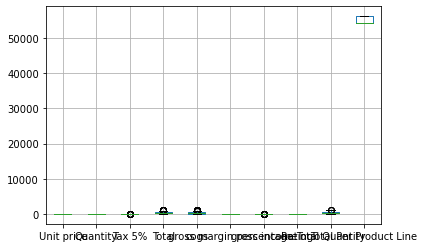

In [15]:
# Deteksi Outlier pada Kolom Numerik
def numerical(column):
    q1 = df1[column].quantile(0.25)
    q3 = df1[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
    return outliers

# Deteksi Outlier pada Kolom Kategorik
def categorical(column):
    value_counts = df1[column].value_counts()
    outliers = value_counts[value_counts < 2]
    return outliers

# Menghitung dan mencetak presentase outlier untuk kolom numerik
persen_dict = {}
total = len(df1)

for column in ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating','Total Quantity','Total Per Product Line']:
    outlier = numerical(column)
    persen = len(outlier) / total * 100
    persen_dict[column] = persen
    print(f"Persentase kolom {column}: {persen:.2f}%")

# Visualisasi Box Plot untuk Mendeteksi Outlier pada Kolom Numerik
df1[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating','Total Quantity','Total Per Product Line']].boxplot()
plt.show()

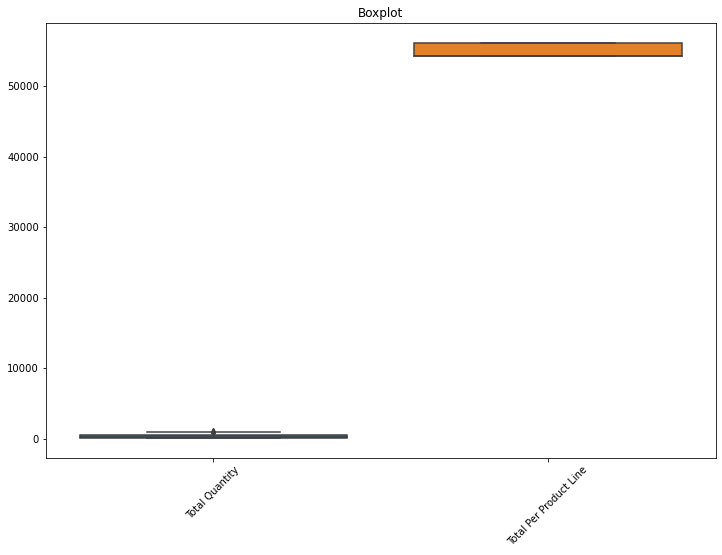

In [16]:
selected_columns = ['Total Quantity','Total Per Product Line']
selected_df = df1[selected_columns]

plt.figure(figsize=(12, 8))
sns.boxplot(data=selected_df)
plt.title('Boxplot')
plt.xticks(rotation=45)
plt.show()

### Dikarenakan pada semua kolom memiliki outlier <10 % maka tidak dilakukan normalisasi atau standarisasi. Apabila > 10 % maka dilakukan normalisasi atau standarisasi.

### Handling Missing Value

In [17]:
count_NaN = df1['Total Quantity'].isnull().sum()
total_values = df1['Total Quantity'].shape[0]
percentage_NaN = (count_NaN / total_values) * 100

print(f"Persentase kolom 'Total Quantity' yang berisi nilai 'NaN' adalah: {percentage_NaN:.2f}%")

Persentase kolom 'Total Quantity' yang berisi nilai 'NaN' adalah: 16.40%


In [18]:
count_NaN1 = df1['Total Per Product Line'].isnull().sum()
total_values1 = df1['Total Per Product Line'].shape[0]
percentage_NaN1 = (count_NaN1 / total_values1) * 100

print(f"Persentase kolom 'Total Quantity' yang berisi nilai 'NaN' adalah: {percentage_NaN1:.2f}%")

Persentase kolom 'Total Quantity' yang berisi nilai 'NaN' adalah: 31.20%


### Kolom dengan outlier

In [19]:
df1.isnull().sum()

Invoice ID                   0
Branch                       0
City                         0
Customer type                0
Gender                       0
Product line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                        0
Date                         0
Time                         0
Payment                      0
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       0
Total Quantity             164
Total Per Product Line     312
dtype: int64

#### Terdapat missing value pada kolom Total Quantity dan Total Per Product Line

### Cek kenormalan data

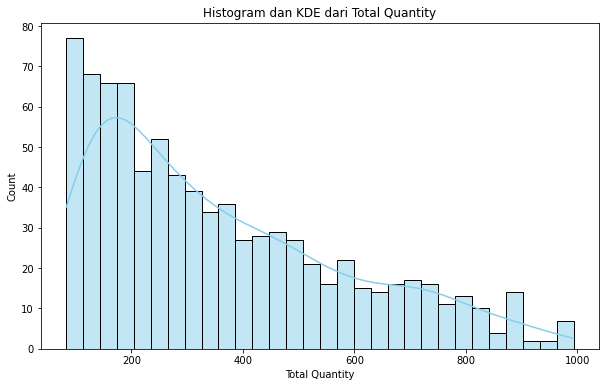

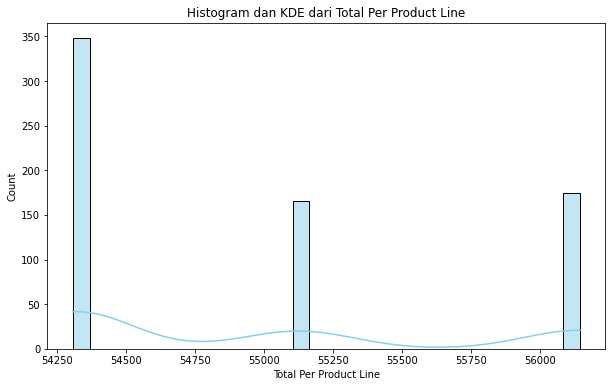

In [20]:
kolom_yang_diperiksa = ['Total Quantity', 'Total Per Product Line']

for kolom in kolom_yang_diperiksa:
    plt.figure(figsize=(10, 6))
    sns.histplot(df1[kolom], kde=True, color='skyblue', bins=30)
    plt.title('Histogram dan KDE dari ' + kolom)
    plt.show()

#### Dikarenan pada kolom Total Quantity dan Total Per Product Line tidak berdistribusi normal maka dilakukan handling missing value menggunakan nilai median.

#### Tidak berdistribusi normal -> nilai median
#### Berdistribusi Normal -> nilai mean
#### Data string -> nilai modus

In [21]:
df1['Total Quantity'] = df1['Total Quantity'].fillna(df1['Total Quantity'].median())
df1['Total Per Product Line'] = df1['Total Per Product Line'].fillna(df1['Total Per Product Line'].median())
df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total Quantity,Total Per Product Line
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.830,54337.5315
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,296.145,54337.5315
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.310,54337.5315
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.760,54337.5315
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.170,55122.8265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,296.145,54337.5315
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,973.800,54337.5315
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,296.145,56144.8440
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,296.145,54337.5315


### Melakukan cek missing value

In [22]:
df1.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Total Quantity             0
Total Per Product Line     0
dtype: int64

### Encoding Data

In [23]:
df_encoded = pd.get_dummies(df1, columns=['Product line', 'Branch', 'City', 'Customer type', 'Gender', 'Payment'], drop_first=True)
df_encoded

,Invoice ID,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,...,Product line_Home and lifestyle,Product line_Sports and travel,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Payment_Credit card,Payment_Ewallet
0,750-67-8428,74.69,7,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,...,0,0,0,0,0,1,0,0,0,1
1,226-31-3081,15.28,5,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,...,0,0,0,1,1,0,1,0,0,0
2,631-41-3108,46.33,7,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,...,1,0,0,0,0,1,1,1,1,0
3,123-19-1176,58.22,8,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,...,0,0,0,0,0,1,0,1,0,1
4,373-73-7910,86.31,7,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,...,0,1,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,40.35,1,2.0175,42.3675,1/29/2019,13:46,40.35,4.761905,2.0175,...,0,0,0,1,1,0,1,1,0,1
996,303-96-2227,97.38,10,48.6900,1022.4900,3/2/2019,17:16,973.80,4.761905,48.6900,...,1,0,1,0,0,0,1,0,0,1
997,727-02-1313,31.84,1,1.5920,33.4320,2/9/2019,13:22,31.84,4.761905,1.5920,...,0,0,0,0,0,1,0,1,0,0
998,347-56-2442,65.82,1,3.2910,69.1110,2/22/2019,15:33,65.82,4.761905,3.2910,...,1,0,0,0,0,1,1,1,0,0


### DATA FINISH

In [24]:
df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total Quantity,Total Per Product Line
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.830,54337.5315
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,296.145,54337.5315
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.310,54337.5315
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.760,54337.5315
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.170,55122.8265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,296.145,54337.5315
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,973.800,54337.5315
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,296.145,56144.8440
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,296.145,54337.5315


## Data Transformation

### How About DataSet ?
#### Data ini berasal dari bps yang berisi mengenai persentase Anak Usia 0-23 Bulan (Baduta) Pernah Diberi ASI di Jawa Timur berdasarkan Kabupaten/Kota di Jawa Timur, Jenis Kelamin(Laki-laki dan Perempuan), dan Lama Pemberian ASI, 2022

In [25]:
df3 = pd.read_excel('laki.xlsx')
df3.head()

,Kabupaten/Kota,0-6,7-11,12-15,16-19,20-23,Total
0,Pacitan,54.83,19.47,14.92,2.87,7.92,100
1,Ponorogo,54.44,27.37,4.29,4.86,9.04,100
2,Trenggalek,38.42,34.28,21.29,4.42,1.59,100
3,Tulungagung,24.56,18.92,24.85,22.52,9.16,100
4,Blitar,13.22,18.74,32.18,10.83,25.03,100


In [26]:
df4 = pd.read_excel('perempuan.xlsx')
df4.head()

,Kabupaten/Kota,0-6,7-11,12-15,16-19,20-23,Total
0,Pacitan,40.60,21.23,1.34,14.53,22.29,100
1,Ponorogo,34.78,22.59,15.64,19.36,7.63,100
2,Trenggalek,33.61,7.83,34.84,13.28,10.42,100
3,Tulungagung,35.36,33.29,9.62,8.35,13.38,100
4,Blitar,36.73,18.12,23.54,9.90,11.70,100


In [27]:
df3 = df3.drop('Total', axis=1)
df4 = df4.drop('Total', axis=1)

In [28]:
data_melt_lak = df3.melt(id_vars = ['Kabupaten/Kota'], var_name =["Usia"],value_name = "Persentase Bayi Laki-Laki")
data_melt_lak.head()

,Kabupaten/Kota,Usia,Persentase Bayi Laki-Laki
0,Pacitan,0-6,54.83
1,Ponorogo,0-6,54.44
2,Trenggalek,0-6,38.42
3,Tulungagung,0-6,24.56
4,Blitar,0-6,13.22


In [29]:
data_melt_per = df4.melt(id_vars = ['Kabupaten/Kota'], var_name =["Usia"],value_name = "Persentase Bayi Perempuan")
data_melt_per.head()

,Kabupaten/Kota,Usia,Persentase Bayi Perempuan
0,Pacitan,0-6,40.60
1,Ponorogo,0-6,34.78
2,Trenggalek,0-6,33.61
3,Tulungagung,0-6,35.36
4,Blitar,0-6,36.73


### Data Finish

In [30]:
finish = pd.concat([data_melt_lak,data_melt_per['Persentase Bayi Perempuan']], axis=1)
finish.head()

,Kabupaten/Kota,Usia,Persentase Bayi Laki-Laki,Persentase Bayi Perempuan
0,Pacitan,0-6,54.83,40.60
1,Ponorogo,0-6,54.44,34.78
2,Trenggalek,0-6,38.42,33.61
3,Tulungagung,0-6,24.56,35.36
4,Blitar,0-6,13.22,36.73


In [31]:
finish['Total Persentase Pemberian ASI'] = finish['Persentase Bayi Laki-Laki'] + finish['Persentase Bayi Perempuan']
finish.head()

,Kabupaten/Kota,Usia,Persentase Bayi Laki-Laki,Persentase Bayi Perempuan,Total Persentase Pemberian ASI
0,Pacitan,0-6,54.83,40.60,95.43
1,Ponorogo,0-6,54.44,34.78,89.22
2,Trenggalek,0-6,38.42,33.61,72.03
3,Tulungagung,0-6,24.56,35.36,59.92
4,Blitar,0-6,13.22,36.73,49.95


In [32]:
finish.isnull().sum()

Kabupaten/Kota                    0
Usia                              0
Persentase Bayi Laki-Laki         0
Persentase Bayi Perempuan         0
Total Persentase Pemberian ASI    0
dtype: int64

In [33]:
finish.duplicated().sum()

0

In [34]:
finish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Kabupaten/Kota                  195 non-null    object 
 1   Usia                            195 non-null    object 
 2   Persentase Bayi Laki-Laki       195 non-null    float64
 3   Persentase Bayi Perempuan       195 non-null    float64
 4   Total Persentase Pemberian ASI  195 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.7+ KB


In [35]:
finish.describe()

,Persentase Bayi Laki-Laki,Persentase Bayi Perempuan,Total Persentase Pemberian ASI
count,195.000000,195.000000,195.000000
mean,19.999231,20.000103,39.999333
std,11.012091,10.983113,19.555123
min,1.590000,1.030000,5.260000
25%,12.130000,11.325000,25.890000
50%,18.230000,18.240000,37.050000
75%,28.120000,26.380000,50.165000
max,54.830000,58.390000,103.980000


#### Melakukan Uji Normalitas Shapiro-Wilk karena ukuran sampel yang lebih kecil, tetapi bisa menjadi sangat sensitif terhadap ukuran sampel besar dan dapat menghasilkan penolakan nol yang signifikan meskipun perbedaan dari distribusi normal kecil.

In [36]:
def normality_test(data):
    stat, p_value = shapiro(data)
    print(f'Statistic = {stat:.3f}, p-value = {p_value:.3f}')
    
    if p_value > 0.05:
        print('Data mungkin mengikuti distribusi normal.')
    else:
        print('Data tidak mengikuti distribusi normal.')

In [37]:
laki = finish['Persentase Bayi Laki-Laki']
normality_test(laki)

Statistic = 0.963, p-value = 0.000
Data tidak mengikuti distribusi normal.


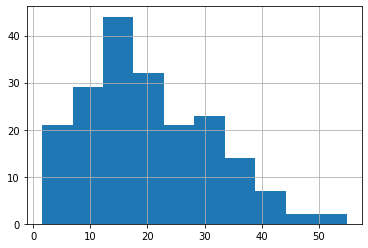

In [38]:
finish['Persentase Bayi Laki-Laki'].hist()
plt.show()

In [39]:
perempuan = finish['Persentase Bayi Perempuan']
normality_test(perempuan)

Statistic = 0.958, p-value = 0.000
Data tidak mengikuti distribusi normal.


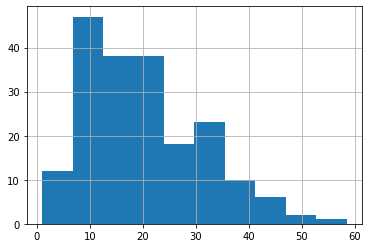

In [40]:
finish['Persentase Bayi Perempuan'].hist()
plt.show()

In [41]:
total = finish['Total Persentase Pemberian ASI']
normality_test(total)

Statistic = 0.956, p-value = 0.000
Data tidak mengikuti distribusi normal.


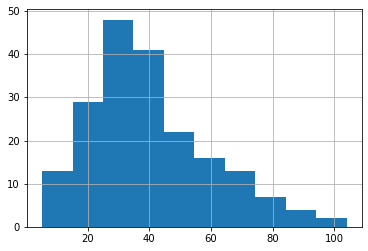

In [42]:
finish['Total Persentase Pemberian ASI'].hist()
plt.show()

#### Dikarenakan data tidak berdistribusi normal maka akan dilakukan transformasi data dengan min max scaller untuk membantu menyamakan skala nilai keduanya dengan rentang 0-1 serta normalisasi dapat membantu mengurangi pengaruh outlier dengan menyamakan skala variabel dan normalisasi Min-Max membantu mengatasi perbedaan skala ini, sehingga variabel memiliki bobot yang seimbang dalam model.

In [43]:
scaler = MinMaxScaler()
kolom_yang_dinormalisasi = ['Persentase Bayi Laki-Laki', 'Persentase Bayi Perempuan', 'Total Persentase Pemberian ASI']
finish_normal = finish.copy()  
finish_normal[kolom_yang_dinormalisasi] = scaler.fit_transform(finish_normal[kolom_yang_dinormalisasi])
data_normal = finish_normal
data_normal.head()

,Kabupaten/Kota,Usia,Persentase Bayi Laki-Laki,Persentase Bayi Perempuan,Total Persentase Pemberian ASI
0,Pacitan,0-6,1.000000,0.689854,0.913391
1,Ponorogo,0-6,0.992675,0.588389,0.850486
2,Trenggalek,0-6,0.691773,0.567992,0.676357
3,Tulungagung,0-6,0.431443,0.598501,0.553687
4,Blitar,0-6,0.218445,0.622385,0.452694
